In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)data.cs
mouse_path =os.path.join("..","..","Resources","data","mouse_drug_data.csv")
clinical_path =os.path.join("..","..","Resources","data","clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_path)
clinical_df=pd.read_csv(clinical_path)
mouse_df=pd.DataFrame(mouse_df)
clinical_df=pd.DataFrame(clinical_df)
# print(mouse_df.head())
# print(clinical_df.head())
# print(mouse_df.shape)
# print(clinical_df.shape)

# Combine the data into a single dataset
merged_df=pd.merge(clinical_df,mouse_df,on="Mouse ID",how="outer")

# Display the data table for preview
print(merged_df.head())
# print(merged_df.shape)

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0           45.000000                 0  Capomulin
1     b128          5           45.651331                 0  Capomulin
2     b128         10           43.270852                 0  Capomulin
3     b128         15           43.784893                 0  Capomulin
4     b128         20           42.731552                 0  Capomulin


## Tumor Response to Treatment 

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
tumor_df=pd.DataFrame(tumor_group['Tumor Volume (mm3)'].mean())
tumor_df=tumor_df.reset_index()
tumor_df=tumor_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume (mm3)'})

# Preview DataFrame
print(tumor_df.head())
print(tumor_df.shape)

        Drug  Timepoint  Mean Tumor Volume (mm3)
0  Capomulin          0                45.000000
1  Capomulin          5                44.266086
2  Capomulin         10                43.084291
3  Capomulin         15                42.064317
4  Capomulin         20                40.716325
(100, 3)


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
sem_df=pd.DataFrame(sem_group['Tumor Volume (mm3)'].sem())
sem_df=sem_df.reset_index()
sem_df=sem_df.rename(columns={'Tumor Volume (mm3)':"Std Err Tumor Volume (mm3)"})

# Preview DataFrame
print(sem_df.head())
print(sem_df.shape)

        Drug  Timepoint  Std Err Tumor Volume (mm3)
0  Capomulin          0                    0.000000
1  Capomulin          5                    0.448593
2  Capomulin         10                    0.702684
3  Capomulin         15                    0.838617
4  Capomulin         20                    0.909731
(100, 3)


In [4]:
# # Minor Data Munging to Re-Format the Data Frames
# tumor_reformat=tumor_df.pivot(index='Timepoint',columns='Drug')
# sem_reformat=sem_df.pivot(index='Timepoint',columns='Drug')

# # Preview that Reformatting worked
# print(tumor_reformat)
# print(sem_reformat)

In [5]:
tumor_merge=pd.merge(tumor_df,sem_df,on=['Drug','Timepoint'],how='outer')
print(tumor_merge.head())
print(tumor_merge.shape)

        Drug  Timepoint  Mean Tumor Volume (mm3)  Std Err Tumor Volume (mm3)
0  Capomulin          0                45.000000                    0.000000
1  Capomulin          5                44.266086                    0.448593
2  Capomulin         10                43.084291                    0.702684
3  Capomulin         15                42.064317                    0.838617
4  Capomulin         20                40.716325                    0.909731
(100, 4)


[ 0  5 10 15 20 25 30 35 40 45]


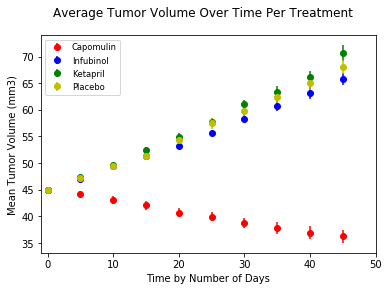

In [6]:
# Generate the Plot (with Error Bars)
x_axis=np.arange(0,46,5)
print(x_axis)

capo_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Capomulin",'Mean Tumor Volume (mm3)'])
capo_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Capomulin",'Std Err Tumor Volume (mm3)'])

infu_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Infubinol",'Mean Tumor Volume (mm3)'])
infu_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Infubinol",'Std Err Tumor Volume (mm3)'])

keta_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Ketapril",'Mean Tumor Volume (mm3)'])
keta_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Ketapril",'Std Err Tumor Volume (mm3)'])

plcb_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Placebo",'Mean Tumor Volume (mm3)'])
plcb_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Placebo",'Std Err Tumor Volume (mm3)'])

fig, tumor=plt.subplots()
fig.suptitle("Average Tumor Volume Over Time Per Treatment")
tumor.set_xlim(-1,50)
tumor.set_xlabel("Time by Number of Days")
tumor.set_ylabel("Mean Tumor Volume (mm3)")
tumor.errorbar(x_axis,capo_mean,yerr=capo_sem, fmt='o', color='r', label='Capomulin')
tumor.errorbar(x_axis,infu_mean,yerr=infu_sem, fmt='o', color='b', label='Infubinol')
tumor.errorbar(x_axis,keta_mean,yerr=keta_sem, fmt='o', color='g', label='Ketapril')
tumor.errorbar(x_axis,plcb_mean,yerr=plcb_sem, fmt='o', color='y', label='Placebo')
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

# Save the Figure


## Metastatic Response to Treatment

In [7]:
 # Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
met_df=pd.DataFrame(met_group['Metastatic Sites'].mean())
met_df=met_df.reset_index()
met_df=met_df.rename(columns={'Metastatic Sites':'Mean Met Sites'})

# Preview DataFrame
print(met_df.head())
print(met_df.shape)

        Drug  Timepoint  Mean Met Sites
0  Capomulin          0        0.000000
1  Capomulin          5        0.160000
2  Capomulin         10        0.320000
3  Capomulin         15        0.375000
4  Capomulin         20        0.652174
(100, 3)


In [8]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
met_sem_df=pd.DataFrame(met_sem_group['Metastatic Sites'].sem())
met_sem_df=met_sem_df.reset_index()
met_sem_df=met_sem_df.rename(columns={'Metastatic Sites':'Std Err Met Sites'})

# Preview DataFrame
print(met_sem_df.head())
print(met_sem_df.shape)

        Drug  Timepoint  Std Err Met Sites
0  Capomulin          0           0.000000
1  Capomulin          5           0.074833
2  Capomulin         10           0.125433
3  Capomulin         15           0.132048
4  Capomulin         20           0.161621
(100, 3)


In [9]:
met_merge=pd.merge(met_df,met_sem_df,on=['Drug','Timepoint'],how='outer')
print(met_merge.head())

        Drug  Timepoint  Mean Met Sites  Std Err Met Sites
0  Capomulin          0        0.000000           0.000000
1  Capomulin          5        0.160000           0.074833
2  Capomulin         10        0.320000           0.125433
3  Capomulin         15        0.375000           0.132048
4  Capomulin         20        0.652174           0.161621


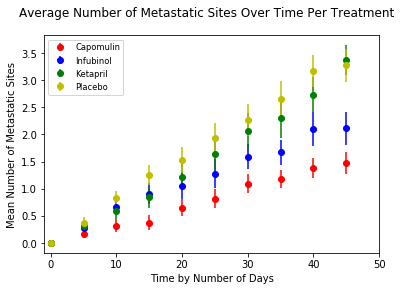

In [10]:
 # Generate the Plot (with Error Bars)
x_axis=np.arange(0,46,5)


fig, tumor=plt.subplots()
fig.suptitle("Average Number of Metastatic Sites Over Time Per Treatment")
tumor.set_xlim(-1,50)
tumor.set_xlabel("Time by Number of Days")
tumor.set_ylabel("Mean Number of Metastatic Sites")
tumor.errorbar(x_axis,np.array(met_merge.loc[met_merge['Drug']=='Capomulin', 'Mean Met Sites']),yerr=np.array(met_merge.loc[met_merge['Drug']=='Capomulin', 'Std Err Met Sites']), fmt='o', color='r', label='Capomulin')
tumor.errorbar(x_axis,np.array(met_merge.loc[met_merge['Drug']=='Infubinol', 'Mean Met Sites']),yerr=np.array(met_merge.loc[met_merge['Drug']=='Infubinol', 'Std Err Met Sites']), fmt='o', color='b', label='Infubinol')
tumor.errorbar(x_axis,np.array(met_merge.loc[met_merge['Drug']=='Ketapril', 'Mean Met Sites']),yerr=np.array(met_merge.loc[met_merge['Drug']=='Ketapril', 'Std Err Met Sites']), fmt='o', color='g', label='Ketapril')
tumor.errorbar(x_axis,np.array(met_merge.loc[met_merge['Drug']=='Placebo', 'Mean Met Sites']),yerr=np.array(met_merge.loc[met_merge['Drug']=='Placebo', 'Std Err Met Sites']), fmt='o', color='y', label='Placebo')
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()
# Save the Figure

# Show the Figure

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
mice_df=pd.DataFrame(mice_group['Mouse ID'].count())
mice_df=mice_df.reset_index()
mice_df=mice_df.rename(columns={'Mouse ID':'# of Mice'})

# Preview DataFrame
print(mice_df.head())

        Drug  Timepoint  # of Mice
0  Capomulin          0         25
1  Capomulin          5         25
2  Capomulin         10         25
3  Capomulin         15         24
4  Capomulin         20         23


In [69]:
mice_reformat=mice_df.pivot(values='# of Mice',index='Timepoint',columns='Drug')
mice_reformat=pd.DataFrame(mice_reformat)
print(mice_reformat)


Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   
25                22        18         18        19        18       17   
30                22        16         17        18        15       15   
35                22        14         12        17        15       14   
40                21        14         10        15        15       12   
45                21        13          9        11        13       11   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0    

Drug       Capomulin  Infubinol  Ketapril  Placebo
Timepoint                                         
0                 25         25        25       25
5                 25         25        23       24
10                25         21        22       24
15                24         21        19       20
20                23         20        19       19
25                22         18        19       17
30                22         17        18       15
35                22         12        17       14
40                21         10        15       12
45                21          9        11       11
[ 0  5 10 15 20 25 30 35 40 45]


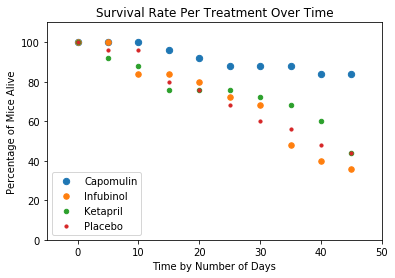

In [83]:
#create dataframe for just the 4 treatments we are analyzing for challenge objective
four_tmts=mice_reformat.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']]
print(four_tmts)

x_axis=np.array(four_tmts.index)
print(x_axis)

# Generate the Plot (Accounting for percentages)
dot_size=50 

for column in four_tmts:
    rates_list=[]
    dot_size=dot_size-10
    for i in four_tmts[column]:
        rate=(i/max(four_tmts[column]))*100
        rates_list.append(rate)
    plt.scatter(x=x_axis,y=rates_list,s=dot_size,marker='o',label=column)
    plt.legend()
    plt.title("Survival Rate Per Treatment Over Time")
    plt.xlabel("Time by Number of Days")
    plt.ylabel("Percentage of Mice Alive")
    plt.xlim(-5,max(x_axis)+5)
    plt.ylim(0,110)